In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
# import glmnet as gln
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
import scipy
import sklearn
%matplotlib inline
plt.style.use('seaborn-white')

# Data extraction

### Read sharing bike data to dataframe and display:

In [133]:
os.chdir(r'C:\Users\Administrator\Desktop')
df = pd.read_csv('day.csv')

In [134]:
df.shape

(731, 16)

In [135]:
number_features = ['temp', 'atemp', 'hum', 'windspeed']
print(df[number_features].describe())

             temp       atemp         hum   windspeed
count  731.000000  731.000000  731.000000  731.000000
mean     0.495385    0.474354    0.627894    0.190486
std      0.183051    0.162961    0.142429    0.077498
min      0.059130    0.079070    0.000000    0.022392
25%      0.337083    0.337842    0.520000    0.134950
50%      0.498333    0.486733    0.626667    0.180975
75%      0.655417    0.608602    0.730209    0.233214
max      0.861667    0.840896    0.972500    0.507463


In [136]:
print(min(df['dteday']))
print(max(df['dteday']))

2011-01-01
2012-12-31


## questions  intend to answer with the dataset

# Data cleanup

### Check for null (missing) values in training data. None found.

In [137]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


<ipython-input-137-6ac79f7ef903>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


## Data Visualization:

### Create plots of mean count vs.  month, and day of week:

##### To do this, can use 'groupby' to group dataframe by a selected variable, e.g. hour, and find the mean count

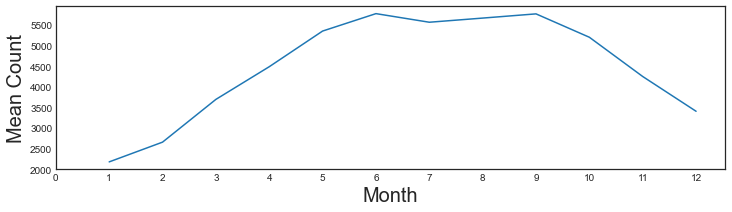

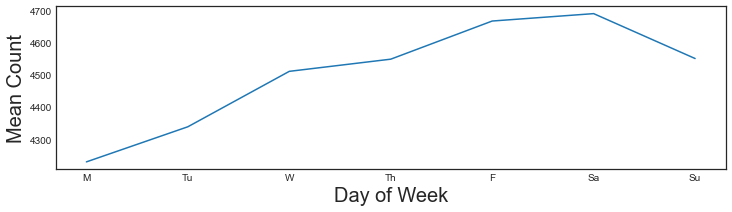

In [138]:


plt.figure(figsize=(12,3))
plt.plot(df.groupby(['mnth']).mean()['cnt'])
plt.xlabel('Month', fontsize=20)
plt.xticks(range(13))
plt.ylabel('Mean Count', fontsize=20)
plt.show()


plt.figure(figsize=(12,3))
plt.plot(df.groupby(['weekday']).mean()['cnt'])
plt.xlabel('Day of Week', fontsize=20)
plt.ylabel('Mean Count', fontsize=20)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['M', 'Tu', 'W', 'Th', 'F', 'Sa', 'Su'])
plt.show()

## Create plots of mean count vs. continuous temperature variables (temperature, temperature feel, windspeed, humidity):

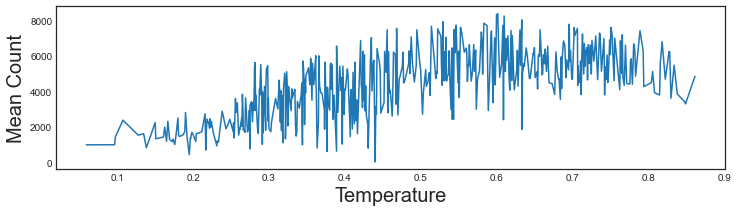

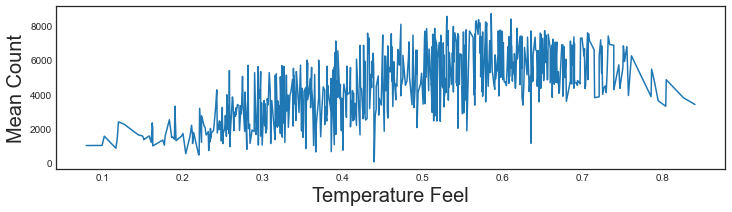

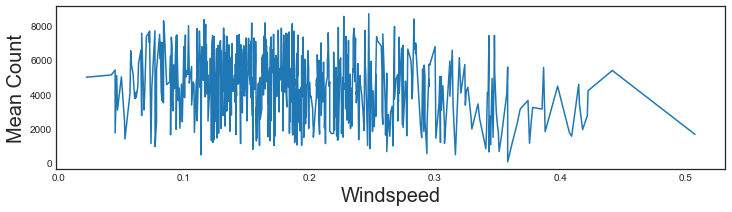

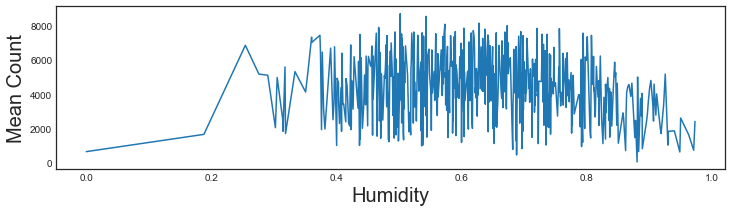

In [139]:
plt.figure(figsize=(12,3))
plt.plot(df.groupby(['temp']).mean()['cnt'])
plt.ylabel('Mean Count', fontsize=20)
plt.xlabel('Temperature', fontsize=20)
plt.show()

plt.figure(figsize=(12,3))
plt.plot(df.groupby(['atemp']).mean()['cnt'])
plt.ylabel('Mean Count', fontsize=20)
plt.xlabel('Temperature Feel', fontsize=20)
plt.show()

plt.figure(figsize=(12,3))
plt.plot(df.groupby(['windspeed']).mean()['cnt'])
plt.ylabel('Mean Count', fontsize=20)
plt.xlabel('Windspeed', fontsize=20)
plt.show()

plt.figure(figsize=(12,3))
plt.plot(df.groupby(['hum']).mean()['cnt'])
plt.ylabel('Mean Count', fontsize=20)
plt.xlabel('Humidity', fontsize=20)
plt.show()

# plt.figure(figsize=(12,3))
# df_hum = df.groupby(['humidity'], as_index = False).mean()
# plt.errorbar(x=df.groupby(['humidity'], as_index = False).mean()['humidity'], 
#              y=df.groupby(['humidity'], as_index = False).mean()['count'], 
#              yerr=df.groupby(['humidity'], as_index = False).std()['count'])
# plt.show()

## Make bar charts of mean count vs. categorial data (season, holiday status, workday status, weather type):

In [140]:
print(df['weathersit'].unique())

[2 1 3]


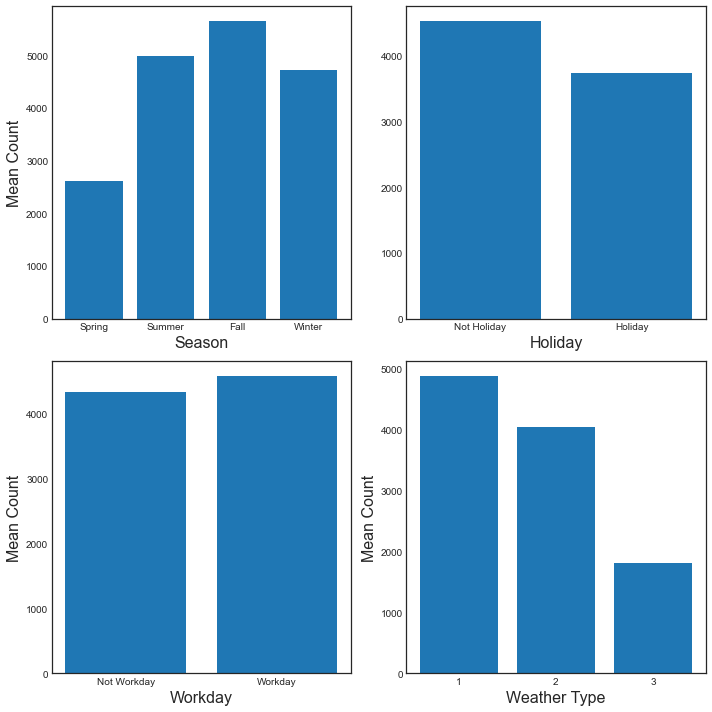

In [141]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axes[0,0].bar(range(4), df.groupby('season').mean()['cnt'])
axes[0,0].set_xticks([0, 1, 2, 3])
axes[0,0].set_xticklabels(['Spring', 'Summer', 'Fall', 'Winter'])
axes[0,0].set_xlabel('Season', fontsize=16)
axes[0,0].set_ylabel('Mean Count', fontsize=16)

axes[0,1].bar(range(2), df.groupby('holiday').mean()['cnt'])
axes[0,1].set_xticks([0, 1])
axes[0,1].set_xticklabels(['Not Holiday', 'Holiday'])
axes[0,1].set_xlabel('Holiday', fontsize=16)
axes[0,0].set_ylabel('Mean Count', fontsize=16)

axes[1,0].bar(range(2), df.groupby('workingday').mean()['cnt'])
axes[1,0].set_xticks([0, 1])
axes[1,0].set_xticklabels(['Not Workday', 'Workday'])
axes[1,0].set_xlabel('Workday', fontsize=16)
axes[1,0].set_ylabel('Mean Count', fontsize=16)
df['weathersit']
axes[1,1].bar(range(3), df.groupby('weathersit').mean()['cnt'])
axes[1,1].set_xticks([0, 1, 2])
axes[1, 1].set_xticklabels(['1', '2', '3'])
axes[1,1].set_xlabel('Weather Type', fontsize=16)
axes[1,1].set_ylabel('Mean Count', fontsize=16)


plt.tight_layout()

## Can plot correlation matrix to identify positive/negative correlations between variables:

<AxesSubplot:>

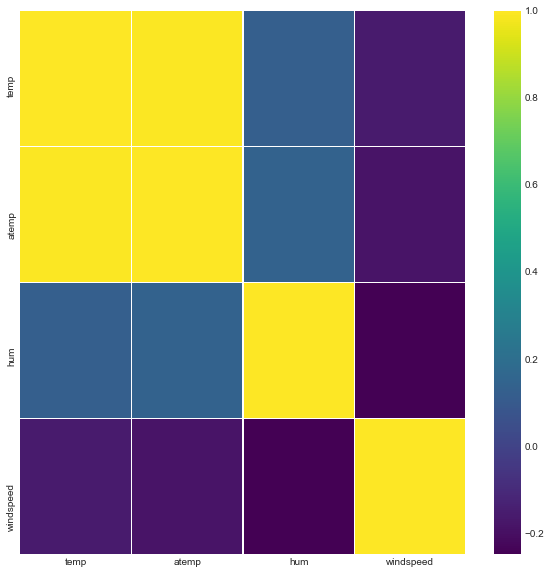

In [142]:
plt.figure(figsize=(10,10))

corr = df[number_features].corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, linewidths=.5, cmap='viridis')

In [143]:
df_new = df.drop(['dteday', 'casual', 'registered','instant'], axis=1)
df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


### Replace categorical variables (e.g. weather category, season, year, day of the week, etc.) with binary dummy variables. For example we now have 4 columns for the four seasons with binary values {1,0}. 
#### (Previously we had a single season variable which could take values 1,2,3,4). <br>

### After this, I believe we need to drop one of the dummy variables per category. For example, since the two possible years are 2011 and 2012, we only need a single binary variable for if year=2012 is True or False. Similarly we should have 6 dummy variables for day of week, 11 dummy variables for month, etc.

In [144]:
df_dummy = pd.get_dummies(df_new,columns=['mnth', 'weathersit', 'yr', 'season','holiday','weekday'])

df_dummy_drop = df_dummy.drop(['mnth_1', 'weekday_0', 'weathersit_1', 'yr_0', 'season_1','holiday_0'], axis=1)

print('All column headings after implementing dummy variables:')
list(df_dummy_drop.columns)

All column headings after implementing dummy variables:


['workingday',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'cnt',
 'mnth_2',
 'mnth_3',
 'mnth_4',
 'mnth_5',
 'mnth_6',
 'mnth_7',
 'mnth_8',
 'mnth_9',
 'mnth_10',
 'mnth_11',
 'mnth_12',
 'weathersit_2',
 'weathersit_3',
 'yr_1',
 'season_2',
 'season_3',
 'season_4',
 'holiday_1',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6']

In [145]:
df_dummy_drop.head()

,workingday,temp,atemp,hum,windspeed,cnt,mnth_2,mnth_3,mnth_4,mnth_5,...,season_2,season_3,season_4,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0.344167,0.363625,0.805833,0.160446,985,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.363478,0.353739,0.696087,0.248539,801,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.196364,0.189405,0.437273,0.248309,1349,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0.200000,0.212122,0.590435,0.160296,1562,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0.226957,0.229270,0.436957,0.186900,1600,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Predictive analytics


# # Linear Regression
### Can fit LR to data and calculate mean square error

In [146]:
df_y = df_dummy_drop['cnt']
df_x = df_dummy_drop.drop('cnt', axis=1)

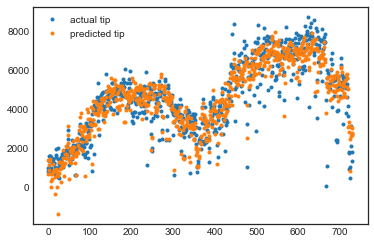

In [147]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
res = model.fit(df_x, df_y)
plt.plot( df_y, '.')
plt.plot(model.predict(df_x), '.')
plt.legend(['actual tip', 'predicted tip'])

d:\download\software\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt', ylabel='Density'>

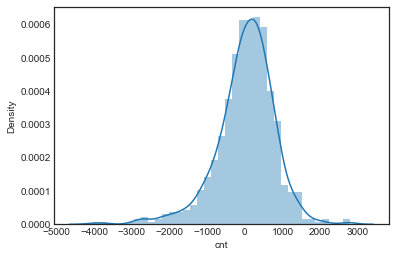

In [148]:
sns.distplot(df_y - model.predict(df_x))

### show coef and mse

In [149]:

# coefficients
print(model.coef_)


[  436.21260176  1689.10021125  3571.61514724  -349.01520908
 -1417.97221976   341.38136011   701.0671831    570.50005921
   755.49800253   617.67938982   106.21413885   513.71580345
  1032.3288211    575.56375956    24.82465764    63.41520959
  -604.08274329 -2309.18435282  2086.06785377   852.50614206
   790.12332157  1579.61053654  -132.60167348   -88.55143154
    10.33720752    87.91931291   115.73405486   178.17178453
   601.58828885]


In [150]:
mean_squared_error(df_y ,model.predict(df_x))

599357.4639363877

In [151]:
from sklearn import ensemble
model = sklearn.ensemble.RandomForestRegressor()
model.fit(df_x,df_y)

RandomForestRegressor()

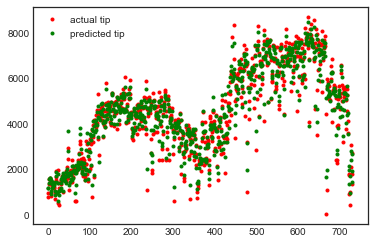

In [152]:
plt.plot( df_y, 'r.')
plt.plot(model.predict(df_x), 'g.')
plt.legend(['actual tip', 'predicted tip'])

d:\download\software\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt', ylabel='Density'>

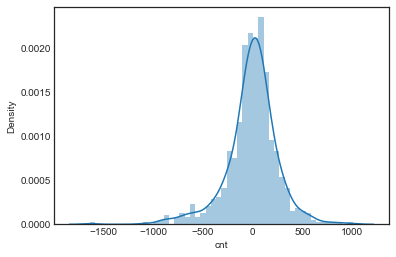

In [153]:
sns.distplot(df_y - model.predict(df_x))

### show mse of randomforest model 

In [154]:
mean_squared_error(df_y ,model.predict(df_x))

67737.52782175102